# Eksploracja danych
## Projekt 3: Grupowanie przy użyciu K-means  
## Karolina Węglowska, Krzysztof Stawarz

In [1]:
rng(1);

In [2]:
Patterns = cell2mat(struct2cell(load('ed-p03.mat', 'Patterns')));
Patterns2 = cell2mat(struct2cell(load('ed-p03.mat', 'Patterns2')));

### __PCA__

1. Normalizacja danych (tak jak przy normalizacji rozkładu Gaussa) - średnia równa 0 i odchylenie standardowe równe 1. 

In [3]:
Patterns = ( Patterns - mean(Patterns) ) ./ std(Patterns);

2. Wyznaczenie macierzy kowariencji

In [4]:
cov_matrix = cov(Patterns)


cov_matrix =

    1.0000   -0.2393    0.3917   -0.3069
   -0.2393    1.0000   -0.1251    0.1483
    0.3917   -0.1251    1.0000   -0.7320
   -0.3069    0.1483   -0.7320    1.0000



3. Wyznaczenie eigenvectors i eigenvalues

In [5]:
[eigenvectors, eigenvalues] = eig(cov_matrix)


eigenvectors =

   -0.1191    0.8286    0.3004   -0.4572
   -0.0518    0.4456   -0.8554    0.2591
    0.7242   -0.1261   -0.2945   -0.6107
    0.6773    0.3146    0.3023    0.5924


eigenvalues =

    0.2599         0         0         0
         0    0.6952         0         0
         0         0    0.9885         0
         0         0         0    2.0564



In [6]:
[~, sort_indices] = sort(diag(eigenvalues), 'descend');
sorted_eigenvectors = eigenvectors(:,sort_indices);

In [7]:
k = 2;
top_k_eigenvectors = sorted_eigenvectors(:,1:k)


top_k_eigenvectors =

   -0.4572    0.3004
    0.2591   -0.8554
   -0.6107   -0.2945
    0.5924    0.3023



In [8]:
principal_components = Patterns * top_k_eigenvectors;

In [9]:
total_variance = sum(diag(cov_matrix));
variation_pca = 100 * diag(eigenvalues(sort_indices,sort_indices)) / total_variance;

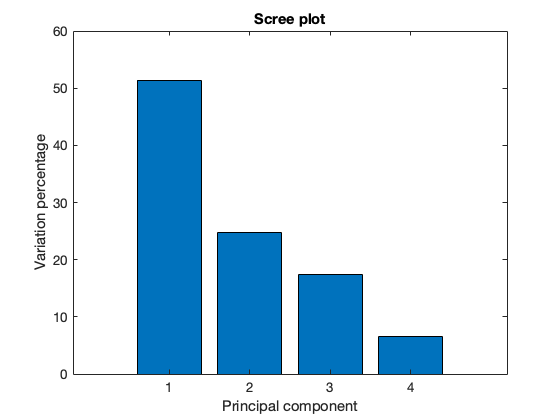

In [10]:
bar([variation_pca(1) variation_pca(2) variation_pca(3) variation_pca(4)]);
xlabel('Principal component');
ylabel('Variation percentage');
title('Scree plot');

In [11]:
pc1_plus_pc2_percentage_variation = variation_pca(1) + variation_pca(2)


pc1_plus_pc2_percentage_variation =

   76.1225



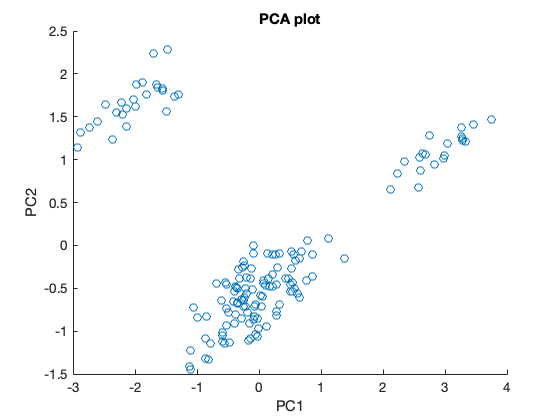

In [12]:
scatter(principal_components(:,1), principal_components(:,2));
xlabel('PC1');
ylabel('PC2');
title('PCA plot');

### __K-means__

In [89]:
k = 20


k =

    20




centroids =

   -0.3258    0.3676
    1.1073    0.6053
    3.2597    1.9856
   -0.2933    2.1521
   -1.7706   -0.9772
   -2.0306    0.4412
   -2.7899    2.0949
    2.5972   -1.3934
   -1.7556   -0.2079
   -2.0579    1.5772
   -0.6285    2.0656
    0.9582    1.8364
    2.7150    1.9358
    0.1414    0.5933
    2.4065   -0.3812
    0.3445    0.7906
   -2.8300    0.7695
   -0.0338    1.5692
   -0.8258    1.8890
    0.9304   -0.7615



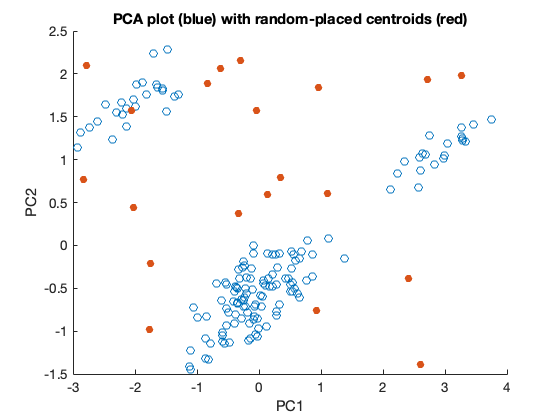

In [90]:
centroids = [];

min_x_val = min(principal_components(:, 1));
max_x_val = max(principal_components(:, 1));

min_y_val = min(principal_components(:, 2));
max_y_val = max(principal_components(:, 2));

for j = 1:k
    rand_x = min_x_val + (max_x_val - min_x_val) * rand();
    
    rand_y = min_y_val + (max_y_val - min_y_val) * rand();
    
    random_centroid = [rand_x rand_y];
    
    centroids = [centroids; random_centroid];
    
end

centroids

scatter(principal_components(:,1), principal_components(:,2));
hold on;
scatter(centroids(:, 1), centroids(:, 2), 'filled');
xlabel('PC1');
ylabel('PC2');
title('PCA plot (blue) with random-placed centroids (red)');

In [91]:
for i = 1:k
    vect_name = sprintf('points_nearest_to_centroid%d', i);
    evalc(sprintf('%s = []', vect_name)); 
end

In [93]:
distance = @(x1, x2, y1, y2) sqrt((x1-x2)^2  + (y1-y2)^2);

In [94]:
for c=1:size(principal_components, 1)
    distances = [];
    
    point_x = principal_components(c, 1);
    point_y = principal_components(c, 2);
    curr_point = [point_x point_y];
    
    for j=1:k
        temp = distance(point_x, centroids(j, 1), point_y, centroids(j, 2));
        distances = [distances temp];
    end
    
    centroid_index = find(distances == min(distances));
    
    evalc(sprintf('points_nearest_to_centroid%d = [points_nearest_to_centroid%d; curr_point]', centroid_index, centroid_index));
    
end

In [95]:
new_centroids = []


new_centroids =

     []



In [99]:
chuj = [0 0; 1 1]


chuj =

     0     0
     1     1



In [100]:
mean(chuj)


ans =

    0.5000    0.5000



In [96]:
for h = 1:k
    evalc(sprintf("cluster%d_mean = mean(points_nearest_to_centroid%d)", h, h));
    evalc(sprintf("new_centroids = [new_centroids; cluster%d_mean]", h));
end

Error using vertcat
Dimensions of arrays being concatenated are not consistent.



In [ ]:
cluser


cluster1_mean =

    0.0618   -0.5563



In [60]:
new_centroids


new_centroids =

   -0.3910   -0.7489
    2.9016    1.0918
   -2.0177    1.6672



In [35]:
isequal(new_centroids, centroids)


ans =

  logical

   0



In [36]:
centroids


centroids =

   -0.1306    1.1125
   -1.5666    1.8338
   -2.7507    1.0574
   -0.1433    0.6394
   -1.9951   -0.7088



In [43]:
kolor =  randi([0, 255], [1, 3])


kolor =

   224    25   107



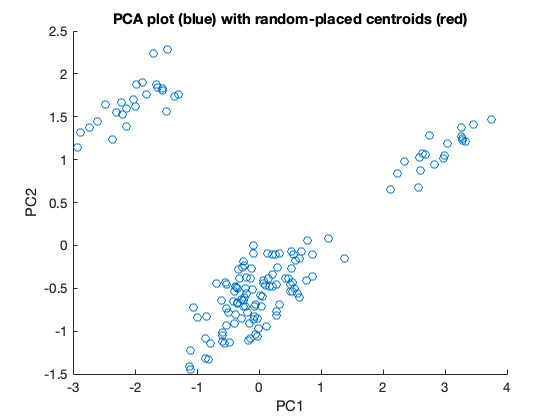

In [45]:
scatter(principal_components(:,1), principal_components(:,2));
hold on;
scatter(centroids(:, 1), centroids(:, 2), 'filled');
xlabel('PC1');
ylabel('PC2');
title('PCA plot (blue) with random-placed centroids (red)');

In [38]:
centroids = new_centroids;

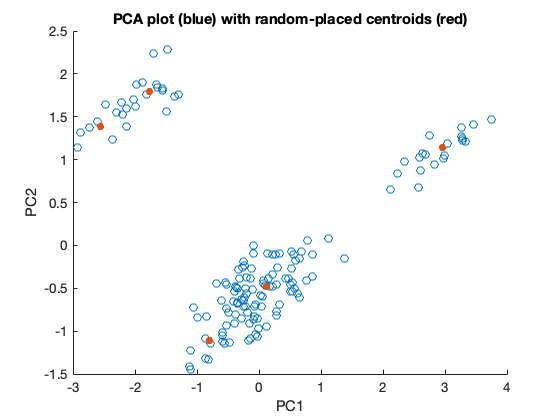

In [39]:
scatter(principal_components(:,1), principal_components(:,2));
hold on;
scatter(centroids(:, 1), centroids(:, 2), 'filled');
xlabel('PC1');
ylabel('PC2');
title('PCA plot (blue) with random-placed centroids (red)');